# Ejercicio 3:
## En el archivo ionosphere.csv hay datos de la ionosfera. Las 34 primeras columnas son valores numéricos y la ultima es una etiqueta de texto con ‘g’ cuando el resultado es bueno y ‘b’ cuando es malo. Importar este conjunto de datos y crear un modelo de clasificación utilizando clasificadores regresión logística, máquinas de vector soporte y k-nn con 3 y 5 vecinos.

Los datos se han de dividir en un conjunto de entrenamiento que contenga el 80% de los datos y otro test con el resto.

Cuestiones: 

¿Qué clasificador muestra una mayor precisión?
¿Qué clasificador muestra un menor error de tipo I?
¿Qué clasificador muestra un menor error de tipo II?

In [1]:
%pylab
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import csv

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('ionosphere.csv', header=None,index_col=False)
data.head(5)
data[34]=pd.get_dummies(data[34])

In [3]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,0
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,1
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,0
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,1
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,0


In [4]:
target = 34
features = list(data.columns)
features.remove(target)

In [5]:
x = data[features] 
y = data[target]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5) 

In [7]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
import matplotlib.pyplot as plt

def metricas_modelos(y_true, y_pred):
    from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
    import matplotlib.pyplot as plt
    
    # Obtención de matriz de confusión
    confusion_matrix = confusion_matrix(y_true, y_pred)

    print('La matriz de confusión es')
    print('[TP     FP(I)]')
    print('[FN(II) TN   ]')
    print()
    print(confusion_matrix)

    print('Precisión:', accuracy_score(y_true, y_pred))
    print('Exactitud:', precision_score(y_true, y_pred))
    print('Exhaustividad:', recall_score(y_true, y_pred))
    print('F1:', f1_score(y_true, y_pred))

    false_positive_rate, recall, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(false_positive_rate, recall)

    print('AUC:', auc(false_positive_rate, recall))

    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)
    plt.show()

# regresión logística

La matriz de confusión es
[TP     FP(I)]
[FN(II) TN   ]

[[173   3]
 [ 21  83]]
Precisión: 0.914285714286
Exactitud: 0.96511627907
Exhaustividad: 0.798076923077
F1: 0.873684210526
AUC: 0.890515734266


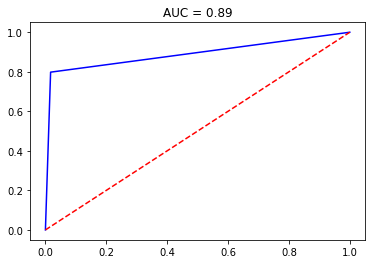

In [8]:
from sklearn.linear_model.logistic import LogisticRegression
from sklearn import preprocessing

classifier = LogisticRegression().fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

metricas_modelos(y_train, y_pred_train)

La matriz de confusión es
[TP     FP(I)]
[FN(II) TN   ]

[[47  2]
 [ 7 15]]
Precisión: 0.87323943662
Exactitud: 0.882352941176
Exhaustividad: 0.681818181818
F1: 0.769230769231
AUC: 0.820500927644


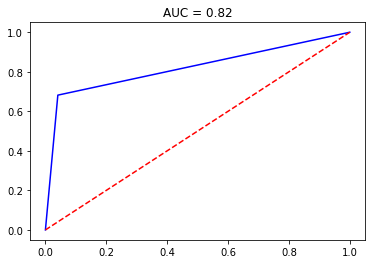

In [9]:
metricas_modelos(y_test, y_pred_test)

# Máquinas de vector soporte

La matriz de confusión es
[TP     FP(I)]
[FN(II) TN   ]

[[174   2]
 [ 13  91]]
Precisión: 0.946428571429
Exactitud: 0.978494623656
Exhaustividad: 0.875
F1: 0.92385786802
AUC: 0.931818181818


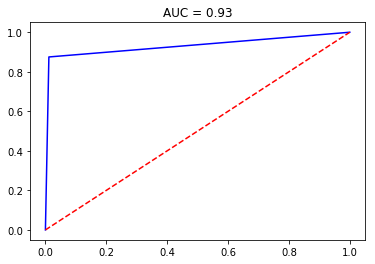

In [10]:
from sklearn.svm import SVC

svm_classifier = SVC().fit(X_train, y_train)
y_pred_train = svm_classifier.predict(X_train)


metricas_modelos(y_train, y_pred_train)

La matriz de confusión es
[TP     FP(I)]
[FN(II) TN   ]

[[49  0]
 [ 3 19]]
Precisión: 0.957746478873
Exactitud: 1.0
Exhaustividad: 0.863636363636
F1: 0.926829268293
AUC: 0.931818181818


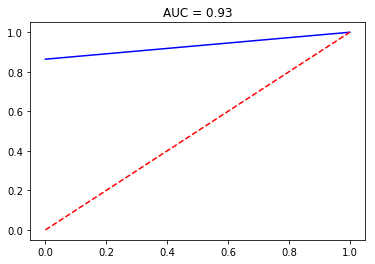

In [11]:
y_pred_test = svm_classifier.predict(X_test)
metricas_modelos(y_test, y_pred_test)

# k-nn

## Con 3 vecinos

La matriz de confusión es
[TP     FP(I)]
[FN(II) TN   ]

[[174   2]
 [ 25  79]]
Precisión: 0.903571428571
Exactitud: 0.975308641975
Exhaustividad: 0.759615384615
F1: 0.854054054054
AUC: 0.874125874126


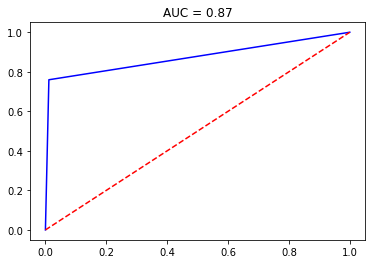

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Creamos el modelo sin entrenar:
model = KNeighborsClassifier(n_neighbors = 3)

# Entrenamos el modelo:
model.fit(X_train, y_train)

# Predecimos la clase para tres puntos diferentes:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

#print(prediction)
metricas_modelos(y_train, y_pred_train)

La matriz de confusión es
[TP     FP(I)]
[FN(II) TN   ]

[[48  1]
 [ 7 15]]
Precisión: 0.887323943662
Exactitud: 0.9375
Exhaustividad: 0.681818181818
F1: 0.789473684211
AUC: 0.830705009276


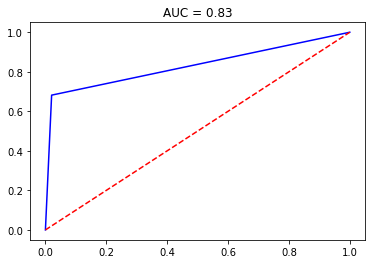

In [13]:
metricas_modelos(y_test, y_pred_test)

## con 5 vecinos

La matriz de confusión es
[TP     FP(I)]
[FN(II) TN   ]

[[172   4]
 [ 36  68]]
Precisión: 0.857142857143
Exactitud: 0.944444444444
Exhaustividad: 0.653846153846
F1: 0.772727272727
AUC: 0.815559440559


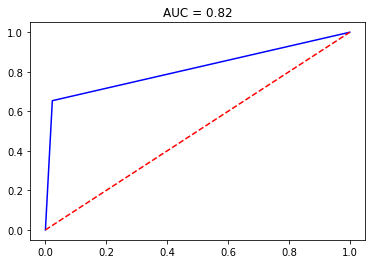

In [14]:
# Creamos el modelo sin entrenar:
model_5 = KNeighborsClassifier(n_neighbors = 5)

# Entrenamos el modelo:
model_5.fit(X_train, y_train)

# Predecimos la clase para tres puntos diferentes:
y_pred_train = model_5.predict(X_train)
y_pred_test = model_5.predict(X_test)

#print(prediction)
metricas_modelos(y_train, y_pred_train)

La matriz de confusión es
[TP     FP(I)]
[FN(II) TN   ]

[[49  0]
 [ 5 17]]
Precisión: 0.929577464789
Exactitud: 1.0
Exhaustividad: 0.772727272727
F1: 0.871794871795
AUC: 0.886363636364


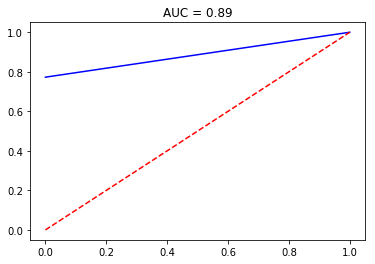

In [15]:
metricas_modelos(y_test, y_pred_test)

# Resultados

## ¿Qué clasificador muestra una mayor precisión? 
El Modelo de Maquina de Vector Soporte: Precisión: 0.957746478873

## ¿Qué clasificador muestra un menor error de tipo I?
El Modelo de Maquina de Vector Soporte: 0

## ¿Qué clasificador muestra un menor error de tipo II?
El Modelo de Maquina de Vector Soporte: 3